In [1]:
import sys
sys.path.append('../')

In [2]:
from src.exploratory_data_analysis import gather_data
import pandas as pd
from sklearn.model_selection import train_test_split

# Building the test set

The final step of the model quality investigation includes building test set. 

It was decided that the test set would consist of 300 samples coming from STA data and the observations would be labeled manually.

First we gather the english dataset and collect only valid articles (containing text), which are not schedules or daily reviews (as they are not reliable articles for IPTC categorisation).

In [18]:
df = gather_data('../data/2023_articles_en')
# filter out articles where 'text' is NaN
df = df[df['text'].notna()]
df = df[df['headline'].str.contains('Schedule of events') == False]
df = df[df['headline'].str.contains('Daily headlines') == False]
df = df[~df['categories'].str.contains('AD|SE|RU', case=False, na=False)]

In [29]:
df = df[['headline', 'lede', 'text', 'high_label']]

In [30]:
df

,headline,lede,text,high_label
3,Government and unions resume wage reform talks,"A month after their last meeting, the governme...",The negotiations come after the government rec...,education
4,Finance pessimistic about EU's green mobility ...,Looking at Europe's current policies regarding...,Europe's existing policies have not chased awa...,environmental issue
5,Weather: Mini cold snap,An incursion of cold air from the north will d...,Daytime highs will remain in the low teens on ...,weather
7,Dnevnik says administrative units product of s...,The newspaper Dnevnik comments on Monday on th...,"On Friday, representatives of Slovenian munici...",politics
8,Govt rating keeps falling,The voter approval rating for the government k...,The government enjoys the support of 41.5% of ...,politics
...,...,...,...,...
9278,Rights groups urge Koper port to implement out...,Labour rights groups urged port operator Luka ...,"Addressing the press in Koper, Damjan Volf of ...",labour
9279,Slovenian IoT provider GOAP acquired by Allterco,"Allterco, a Bulgarian developer of internet of...",The total value of the outstanding stake range...,sport
9280,Slovenian co-operative allegedly victim of fraud,Slovenian police are investigating suspicion t...,The president of the Koroška Agricultural and ...,"crime, law and justice"
9281,Medical wholesaler Salus buys another rival,Pharmaceutical and medical equipment wholesale...,Farmadent was founded and owned by six municip...,health


We consider 3 methods of sampling for the test set. In each case we set the seed to 42, to provide reproducible data sets. 

## 1. Balanced sampling

Creating a test dataset such that each category has the same number of samples.

In [31]:
strata_column = 'high_label'
unique_categories = df[strata_column].unique()
samples_per_category = 300 // len(unique_categories)
test_balanced = pd.DataFrame()


for category in unique_categories:
    category_samples = df[df[strata_column] == category].sample(samples_per_category, random_state=42)
    test_balanced = pd.concat([test_balanced, category_samples], axis=0)

In [32]:
test_balanced.to_csv('../data/test_sets/test_set_balanced.csv', index=False)

## 2. Stratified sampling

Creating a test dataset such that each ITPC category has the same proportion of samples as the original dataset. Note, that stratified and balanced sampling are done with regard to the predicted classes (not ground-truth classes), so the results of such sampling might be biased.

In [33]:
strata_column = 'high_label'

total_size = len(df)
test_size = 300 / total_size

train_stratified, test_stratified = train_test_split(df, test_size=test_size, stratify=df[strata_column], random_state=42)


In [34]:
test_stratified.to_csv('../data/test_sets/test_set_stratified.csv', index=False)

# 3. Random sampling

We choose the samples randomly, so theoretically the distribution of classes in the test set would imitate the real distribution pf IPTC classes.

In [35]:
train_random, test_random = train_test_split(df, test_size=test_size, random_state=42)

In [36]:
test_random.to_csv('../data/test_sets/test_set_random.csv', index=False)

We show value counts of IPTC categories in each separate dataset. 

In [37]:
test_random

,headline,lede,text,high_label
2193,Dnevnik: Govt forced to act fast on top-up ins...,Dnevnik argues in Thursday's commentary that t...,"""It was not just prestige and political stabil...",politics
583,Marguč 3rd in last Snowboard World Cup paralle...,Slovenian snowboarder Rok Marguč finished thir...,Marguč finished behind Austria's Fabian Obmann...,sport
8437,Corruption watchdog says it cannot be moral ar...,The Commission for the Prevention of Corruptio...,"""Because of vaious inaccurate assessments of o...","crime, law and justice"
7367,First public prayers draw split opinions,The Catholic Youth organisation held the first...,A public prayer is more powerful than a privat...,religion and belief
8861,Delo comments on Slovenia's limited power to h...,While people in Bosnia-Herzegovina appreciate ...,Slovenian Foreign Minister Tanja Fajon said th...,politics
...,...,...,...,...
9024,Slovenia's foreign trade of goods remains robust,Slovenia exported EUR 4.8 billion worth of goo...,"Compared to November 2021, the value of export...","economy, business and finance"
2510,Minister announces solution for health insuran...,After insurer Generali announced that its mont...,While the Insurance Supervision Agency said to...,health
7715,Suspended prison sentences for Mirko and Tanja...,The Celje Higher Court has largely upheld the ...,The case concerns the transfer between 2011 an...,education
548,Primorske endorses language requirement for fa...,Commenting on the changes to the foreigners ac...,"""The claim by the Left and certain NGOs is sur...",social issue


In [38]:
counts_df = pd.DataFrame({'Balanced':test_balanced['high_label'].value_counts(),
                          'Stratified': test_stratified['high_label'].value_counts(),
                          'Random': test_random['high_label'].value_counts()})
counts_df

,Balanced,Stratified,Random
high_label,,,
"arts, culture and entertainment",17,17,17
"crime, law and justice",17,27,32
disaster and accident,17,21,18
"economy, business and finance",17,48,52
education,17,11,12
environmental issue,17,15,16
health,17,14,14
human interest,17,4,4
labour,17,18,14


# Data labeling

To speed up the labour, a python application was built. It allows the user to:
1. View articles along with their headlines
2. See the label predicted by machine learning method (in our case embedding cosine similarity)
3. See the label assigned by annotator
4. Click on one of the IPTC cateogry names (buttons on the right side) to assign the chosen category.

Important note, that in `data/test_sets` folder there are unlabeled test sets. The labeled test set is created inside `labeling_app/labeled_data.csv`

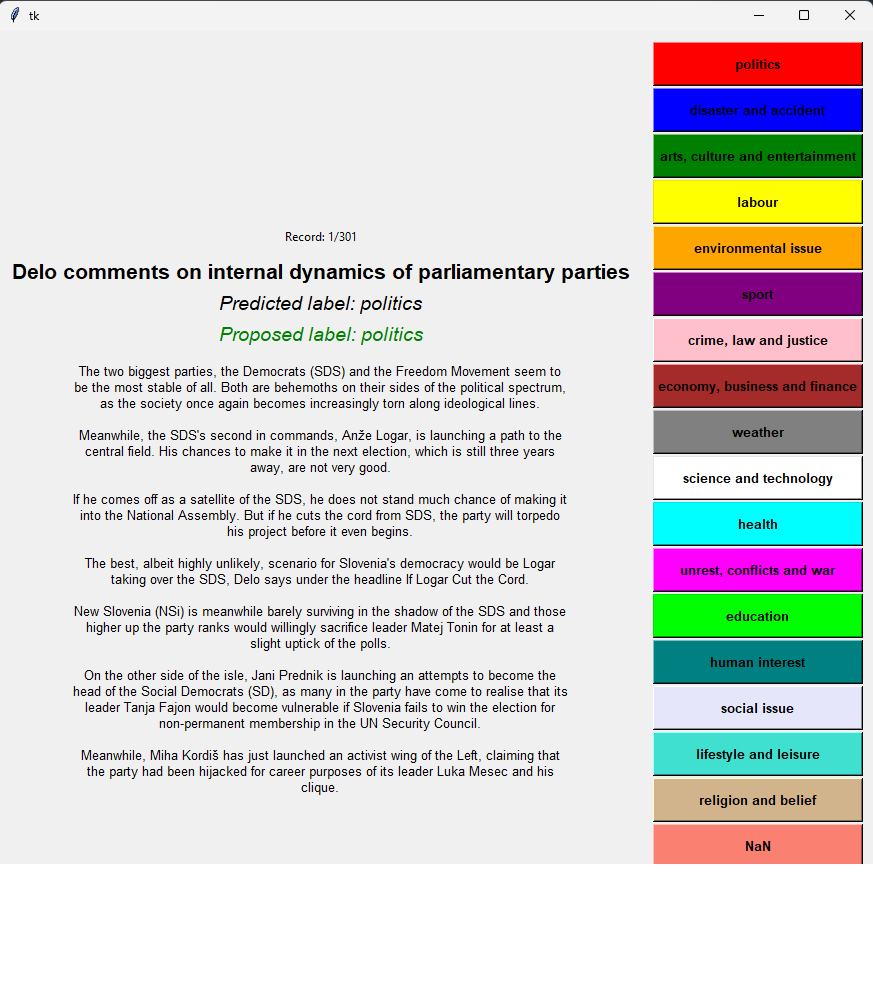

In [ ]:
from IPython import display
display.Image("../static/app.png")

The labeled data looks like this:

In [1]:
import pandas as pd

In [5]:
labeled_data=pd.read_csv('../labeling_app/labeled_data_old.csv')
labeled_data = labeled_data[['headline', 'text', 'high_label', 'proposed_label']]
labeled_data.head()

,headline,text,high_label,proposed_label
0,Ombudsman and NGOs call for child-centred educ...,The Slovenian education system is too focused ...,social issue,education
1,Equality ombudsman calls for shelters for disa...,The 2023-2028 resolution on the national progr...,"crime, law and justice","crime, law and justice"
2,Dnevnik says EU should change its attitude to ...,Although it went through all the stages of ind...,"unrest, conflicts and war","unrest, conflicts and war"
3,Fajon says UN Security Council bid good for Sl...,Fajon sees this as an investment in the future...,politics,politics
4,"Weather: Cloudy in E, sunny in W",Morning lows will range from -12 to -6 degrees...,weather,weather
